In [40]:
chytrid_binomial<- read.csv("~/Downloads/chytrid_binomial.csv", stringsAsFactors = T)
mites <- read.csv("~/Downloads/bee_mites.csv", stringsAsFactors=TRUE)
chytrid <- read.csv("~/Downloads/chytrid.csv", stringsAsFactors=TRUE)
genome <- read.csv("~/Documents/TheMulQuaBio/content/data/GenomeSize.csv", stringsAsFactors=T)
genome$logGS <- log(genome$GenomeSize)
genome$logGS <- log(genome$GenomeSize)
genome$logBW <- log(genome$BodyWeight)
genome$logTL <- log(genome$TotalLength)
genome$logFL <- log(genome$ForewingLength)
genome$logFA <- log(genome$ForewingArea)
mammals <- read.csv("~/Documents/TheMulQuaBio/content/data/MammalData.csv", stringsAsFactors=T)
mammals$logCvalue <- log(mammals$meanCvalue)
source("stat_functions.R")

# Model Fitting
## Linear Models

###  Linear Regression
Use when both variables are continuous. 
1. **Visualise data**: slight curves can be log-transformed to get a straight line (from power law to linear relationship). 

In [31]:
# Fit model
model <- lm(logBW ~ logGS, data=genome, subset= Suborder == "Anisoptera")

In [32]:
summary(model) # check significance/explanatory power of coefficients


Call:
lm(formula = logBW ~ logGS, data = genome, subset = Suborder == 
    "Anisoptera")

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3243 -0.6124  0.0970  0.5194  1.3236 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.39947    0.09085 -26.413  < 2e-16 ***
logGS        1.00522    0.23975   4.193 9.54e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6966 on 58 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.2326,	Adjusted R-squared:  0.2194 
F-statistic: 17.58 on 1 and 58 DF,  p-value: 9.539e-05


1. Check **significance** of model (F-statistic) and each coefficient
2. **R-squared**- how much variance in y is explained by model
3. **Residual standard error** Uncertainty of the model- how much variation not explained (want to be low)

In [33]:
anova(model) # check explanatory power of model

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
logGS,1,8.52939,8.5293897,17.57907,9.538946e-05
Residuals,58,28.14168,0.4852014,NA,NA


- Gives same F-value as above
- Explanatory power of model can be calculated as ESS/TSS: Model here explains 23% of variation (oh shown in R-squared above)

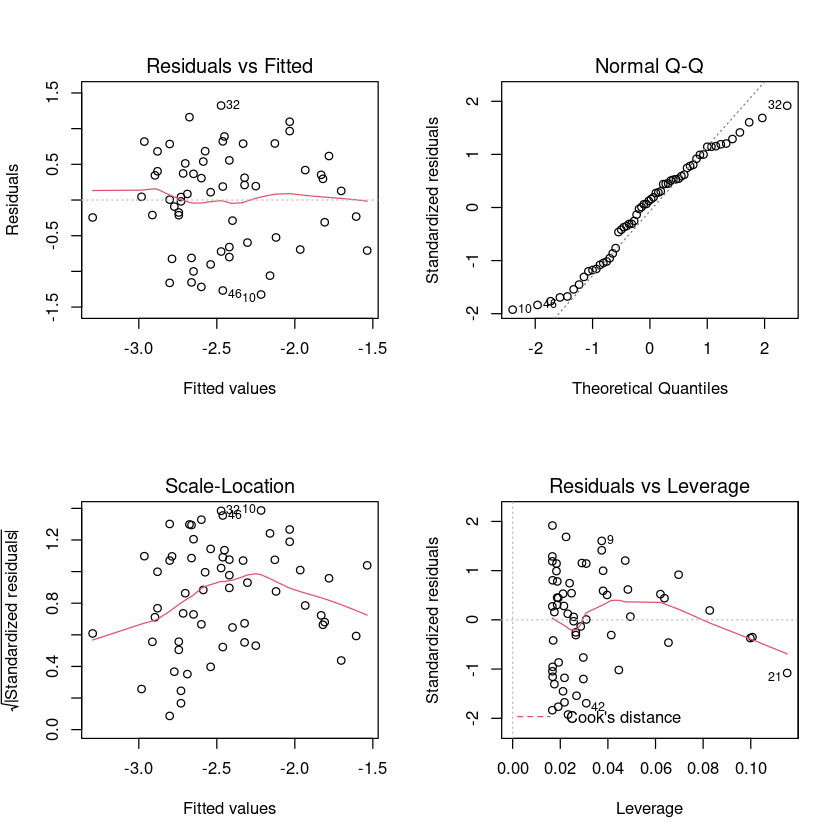

In [37]:
# Check appropriateness of model to data
par(mfrow=c(2,2))
plot(model)

### ANOVA
Used when response is continuous and explanatory variable is categorical

In [41]:
# Fit model and conudct anova
trophicLM <- lm(logCvalue~TrophicLevel, data=mammals)
anova(trophicLM) # one way anova 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TrophicLevel,2,0.8268678,0.41343388,7.220365,0.0008657029
Residuals,300,17.1778247,0.05725942,NA,NA


One way ANOVA tests if a single factor has an affect of response variable. See if it's significant + how much variation it explains. Then you can use summary() to see impact of each variable in factor

In [42]:
summary(trophicLM)


Call:
lm(formula = logCvalue ~ TrophicLevel, data = mammals)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.50378 -0.16350 -0.00379  0.15114  0.93130 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.08507    0.03351  32.383  < 2e-16 ***
TrophicLevelHerbivore  0.11186    0.03958   2.826 0.005027 ** 
TrophicLevelOmnivore   0.15128    0.03985   3.796 0.000178 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2393 on 300 degrees of freedom
  (76 observations deleted due to missingness)
Multiple R-squared:  0.04593,	Adjusted R-squared:  0.03956 
F-statistic:  7.22 on 2 and 300 DF,  p-value: 0.0008657


### Interaction of variables

In [44]:
int_model <- lm(logBW~logGS*Suborder, data=genome)

## Generalised Linear Models
### Poisson

PLOT DATA- look at distribution/shape

**1. Fit model**

In [5]:
glm_m <- glm(Dead_mites~Concentration, data=mites, family="poisson")

**2.How explanatory is model?**
- Is the model significant?

In [6]:
anova(glm_m, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,114,154.7902,NA
Concentration,1,45.53526,113,109.2549,1.499153e-11


- P value gives significance. Model *does* explain significant variation in data.

Check composition- Are all of the parameters significant? How much variation do they explain?

In [8]:
summary(glm_m) # get model composition


Call:
glm(formula = Dead_mites ~ Concentration, family = "poisson", 
    data = mites)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.84167  -0.61720  -0.00242   0.47048   1.82502  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)    0.52820    0.09316   5.670 1.43e-08 ***
Concentration  0.57181    0.08132   7.032 2.04e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 154.79  on 114  degrees of freedom
Residual deviance: 109.25  on 113  degrees of freedom
AIC: 398.71

Number of Fisher Scoring iterations: 5


- *Null Deviance* variance in Null model (total variance of y)
- *Residual Deviance* Sum squared residuals (RSS)

1. What is model saying? What is the influene of explanatory variable (exp increase, fold increase)
    - Ex: model shows significant influence of Concentration on mite death. For every 1 unit increase in concentration, dead mites increases by $e^0.57$, or 1.77-fold.

2. Calculate *Psuedo-R^2* (percentage of variation explained by the model):

$$
pseudoR^2 = 1-\frac{ResidDeviance}{NullDeviance}
$$

**3. How appropriate is the model?** How well does model fit the data
1. plot model diagnostics
2. Calculate *Dispersion*- looking for dispersion of 1. 

    $$
    Dispersion = \frac{ResidDeviance}{df}
    $$

### Binary

In [10]:
#1. Fit the model:
m_binary <- glm(InfectionStatus~Springavgtemp, data = chytrid, family="binomial")
summary(m_binary)


Call:
glm(formula = InfectionStatus ~ Springavgtemp, family = "binomial", 
    data = chytrid)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4683  -1.2470   0.9772   1.0860   1.1794  

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -0.057236   0.055585  -1.030    0.303    
Springavgtemp  0.052629   0.008447   6.231 4.65e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 9310.0  on 6794  degrees of freedom
Residual deviance: 9270.7  on 6793  degrees of freedom
AIC: 9274.7

Number of Fisher Scoring iterations: 4


In [11]:
# Back transform log-odd ratios to get probability p
plogis(coef(m_binary))

(Intercept) Springavgtemp 
    0.4856950     0.5131542

- With every unit increase in temperature, probability of infection increases by 51%

**Flipping point:** Point at which prob becomes more likely (greater than 0.5)

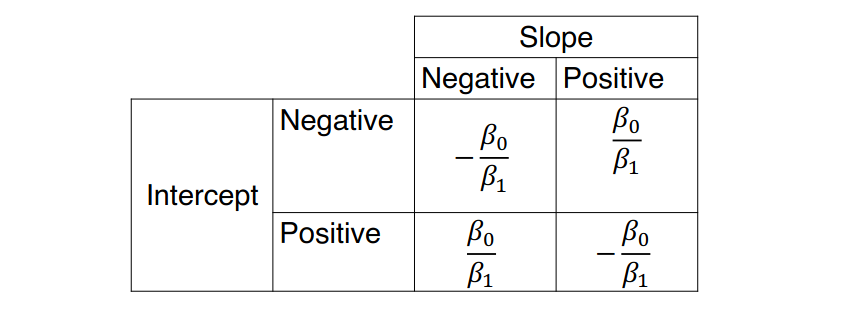

Value of explanatory variable where presence of response variable becomes *more* likely (p greater than 0.5)

**Psuedo Rsqaured**: Pretty much the only model validation since data only consists of zeros and ones.

### Binomial
- Looks not as presence/absence outcome, but as range of prob. 
- Use cbind to model ratio of total presence/total absence agaisnt some explanatory variable-  how prob changes along some r.v.

In [15]:
# 1. fit the model
M3 <- glm(cbind(Positives, Total-Positives)~ AverageSpringTemp, family="binomial", data=chytrid_binomial)

In [17]:
# 2. assess model
summary(M3) # Check significant/ explanatory power of model and coefficients


Call:
glm(formula = cbind(Positives, Total - Positives) ~ AverageSpringTemp, 
    family = "binomial", data = chytrid_binomial)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.9963  -4.6700  -0.0673   3.2884  11.6684  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -0.403670   0.037311  -10.82   <2e-16 ***
AverageSpringTemp  0.088839   0.005572   15.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5055.4  on 174  degrees of freedom
Residual deviance: 4795.7  on 173  degrees of freedom
AIC: 5410.5

Number of Fisher Scoring iterations: 4


In [23]:
anova(M3, test="Chisq") # check significance of model

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,174,5055.383,NA
AverageSpringTemp,1,259.6426,173,4795.740,2.053166e-58


In [21]:
# backtransform logit probability
plogis(coef(M3)) # 53% prob increase with 1 unit increase of temperature

(Intercept) AverageSpringTemp 
        0.4004310         0.5221951

In [25]:
# Calculate psuedo R
psuedoR(M3)

[1] 0.05135963

In [28]:
# Calculate dispersal
get_dispersion(M3) #over dispersed boi- likely missing key components to model

[1] 27.72104